# 1.2 Dataset Visualization in R

Author: Sandra Godinho Silva \
Creation date: 07/09/2020 \
Version: 0.1

Input from **notebook 1.1 - Dataset Creation**: Dataset.csv

In [1]:
library(ggplot2)
library(grid)
library(gridExtra)
library(dplyr)
library(plyr)
library(ggpubr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:plyr’:

    mutate



In [2]:
data <- read.csv("Dataset.csv", header=T, row.names="Genome_ID")
head(data)

,Bin_Id,Marker.lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,⋯,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality
GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium johnsoniae,Bacteria,Bacteroidota,Bacteroidia,⋯,6096872,1,6096872,6096872,6096872,1,100,0.34113,0,High
GCA_000023285.1,GCA_000023285.1_ASM2328v1_genomic,p__Bacteroidetes (UID2605),100.00,0.00,0,100.00,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Capnocytophaga;s__Capnocytophaga ochracea,Bacteria,Bacteroidota,Bacteroidia,⋯,2612925,1,2612925,2612925,2612925,1,100,0.39588,0,High
GCA_000023465.1,GCA_000023465.1_ASM2346v1_genomic,s__algicola (UID2847),99.62,0.57,0,96.77,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Zunongwangia;s__Zunongwangia profunda,Bacteria,Bacteroidota,Bacteroidia,⋯,5128187,1,5128187,5128187,5128187,1,100,0.36218,0,High
GCA_000023725.1,GCA_000023725.1_ASM2372v1_genomic,o__Flavobacteriales (UID2815),100.00,0.00,0,100.00,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Weeksellaceae;g__Kaistella;s__Kaistella sp000023725,Bacteria,Bacteroidota,Bacteroidia,⋯,2768102,1,2768102,2768102,2768102,1,100,0.42693,0,High
GCA_000024125.1,GCA_000024125.1_ASM2412v1_genomic,s__algicola (UID2846),99.01,0.11,0,98.46,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Robiginitalea;s__Robiginitalea biformata,Bacteria,Bacteroidota,Bacteroidia,⋯,3530383,1,3530383,3530383,3530383,1,100,0.55293,0,High
GCA_000060345.1,GCA_000060345.1_ASM6034v1_genomic,s__algicola (UID2847),99.62,0.19,0,98.67,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Gramella;s__Gramella forsetii,Bacteria,Bacteroidota,Bacteroidia,⋯,3798465,1,3798465,3798465,3798465,1,100,0.36611,0,High


## 4 faceted bar plots

In [9]:
data <- as.data.frame(lapply(data, unlist))
data <- data %>% arrange(Quality_score)
data$Classification_f = factor(data$Classification_quality, levels=c("High","Medium","Low"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Saving 8,67 x 8,67 in image


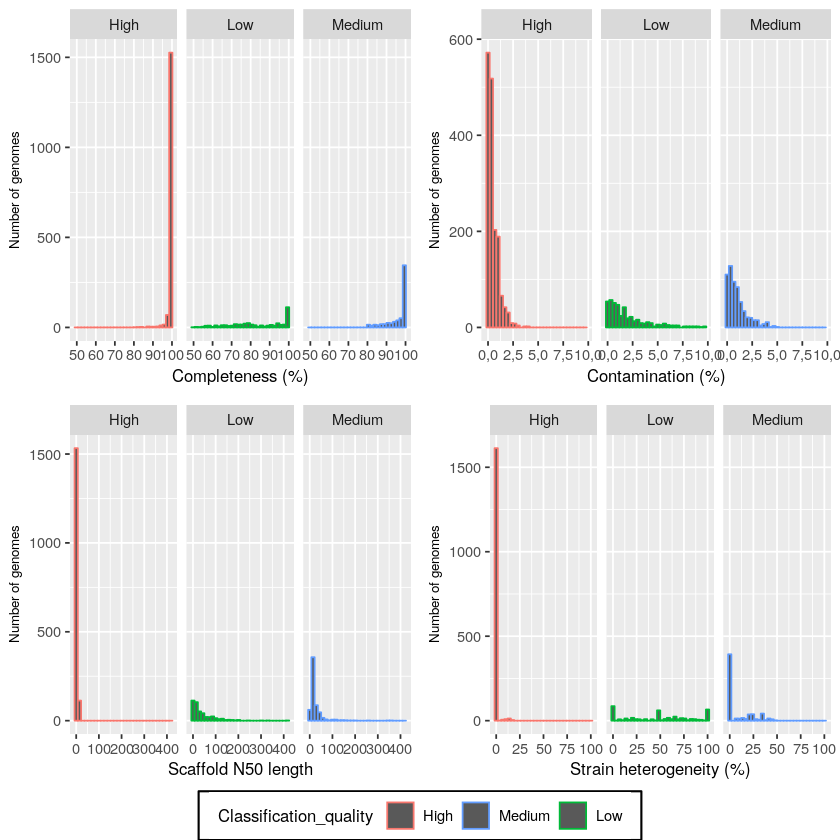

In [13]:
#theme_set(theme_bw())
a <- ggplot(data, aes(x=Completeness, color=Classification_quality)) +
  geom_histogram(position="identity") +
  labs(y="Number of genomes", x="Completeness (%)") +
  theme(axis.title.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        legend.box.background = element_rect(colour = "black", size = 0.6),
        legend.box.margin = margin(0.5, 6, 0.5, 6),
        legend.title = element_text(size=10))+
  scale_color_discrete(breaks=c("High","Medium","Low")) + 
  facet_wrap(. ~ Classification_quality)

b <- ggplot(data, aes(x=Contamination, color=Classification_quality)) +
  geom_histogram(position="identity") +
  labs(y="Number of genomes", x="Contamination (%)") +
  theme(axis.title.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        legend.box.background = element_rect(colour = "black", size = 0.6),
        legend.box.margin = margin(0.5, 6, 0.5, 6),
        legend.title = element_text(size=10))+
  scale_color_discrete(breaks=c("High","Medium","Low")) + 
  facet_wrap(. ~ Classification_quality)

c <- ggplot(data, aes(x=scaf_N50, color=Classification_quality)) +
  geom_histogram(position="identity") +
  labs(y="Number of genomes", x="Scaffold N50 length") +
  theme(axis.title.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        legend.box.background = element_rect(colour = "black", size = 0.6),
        legend.box.margin = margin(0.5, 6, 0.5, 6),
        legend.title = element_text(size=10),
        plot.margin=unit(c(5.5, 5.5, 7, 5.5), "pt"))+
  scale_color_discrete(breaks=c("High","Medium","Low"))+ 
  facet_wrap(. ~ Classification_quality)

d <- ggplot(data, aes(x=Strain_heterogeneity, color=Classification_quality)) +
  geom_histogram(position="identity") +
  labs(y="Number of genomes", x="Strain heterogeneity (%)") +
  theme(axis.title.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        legend.box.background = element_rect(colour = "black", size = 0.6),
        legend.box.margin = margin(0.5, 6, 0.5, 6),
        legend.title = element_text(size=10),
        plot.margin=unit(c(5.5, 5.5, 7, 5.5), "pt"))+
  scale_color_discrete(breaks=c("High","Medium","Low"))+ 
  facet_wrap(. ~ Classification_quality)

ggarrange(a, b, c, d, ncol=2, nrow=2, common.legend = TRUE, legend="bottom")

#ggsave("Comparison2", device="png",scale=1.3)

## Plot 2

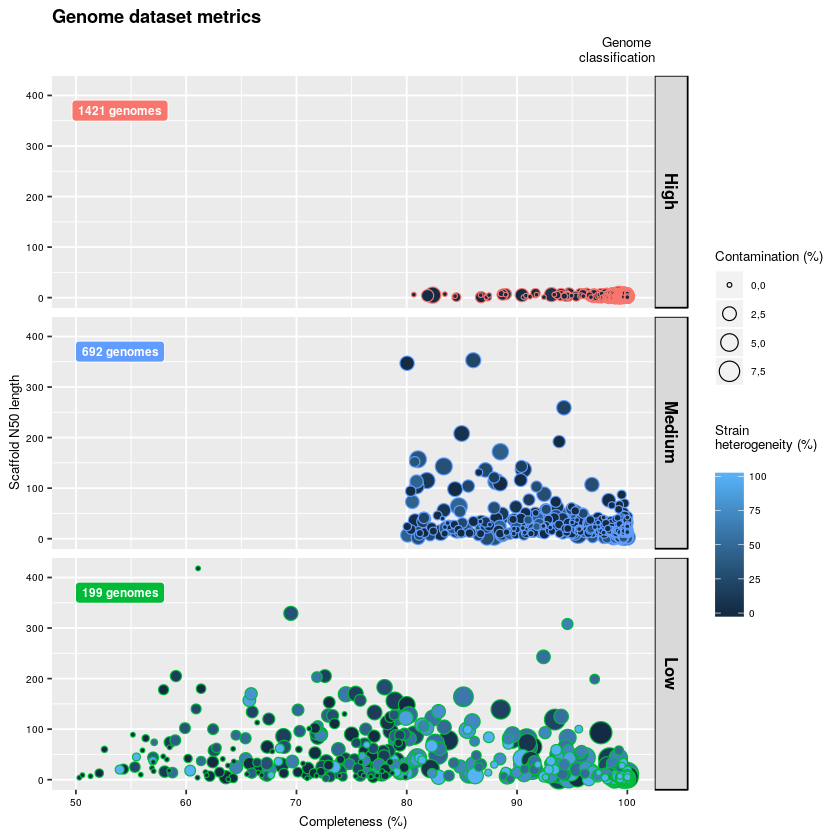

In [14]:
g <- ggplot(data, aes(x=Completeness, y=scaf_N50,  
                       fill=Strain_heterogeneity, colour=Classification_quality,size=Contamination,))+
  geom_point(shape=21) +
  guides(color=FALSE) + #remove legend for Classification
  scale_color_discrete(breaks=c("High","Medium","Low"), aes(fillcolour="black")) +
  scale_size_continuous(range=c(1,6)) +
  labs(y="Scaffold N50 length", x="Completeness (%)",
       subtitle = "Genome \nclassification",
       title= "Genome dataset metrics",
       fill = "Strain \nheterogeneity (%) \n", size="Contamination (%)")+
  facet_grid(rows = vars(Classification_f))+ 
  theme(plot.title = element_text(size = 11, face="bold"),
        plot.subtitle= element_text(size=8, hjust = 1),
        legend.title = element_text(size=8),
        axis.title = element_text(size=8, colour="black"),
        axis.text.x = element_text(size=6, colour = "black"),
        axis.text.y = element_text(size=6, colour = "black"),
        legend.text = element_text(size=6),
        strip.text.y = element_text(size= 10, color = "black", face="bold"),
        strip.background = element_rect(color="black", linetype="solid")) 

anno <- data.frame(lab = c("1421 genomes", "692 genomes", "199 genomes"),
                   Classification_f = c("High","Medium","Low"))

c <-g + geom_label(data = anno, mapping = aes(x = 54, y = 370, label = lab), colour="white",
                   fill=c("#F8766D", "#619CFF", "#00BA38"),size=2.5, fontface="bold",inherit.aes = FALSE)
c


Warning message:
“The plyr::rename operation has created duplicates for the following name(s): (`colour`)”

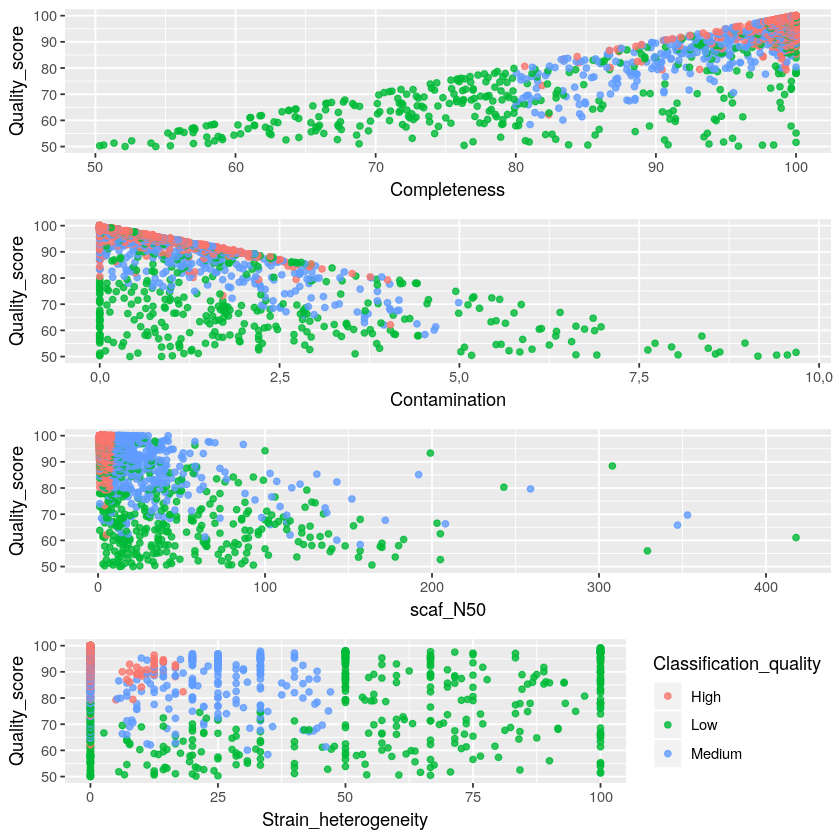

In [16]:
a <- ggplot(data, aes(y=Quality_score, x=Completeness, color=Classification_quality, colour = clarity)) +
  geom_point(alpha=0.8) 

b <- ggplot(data, aes(y=Quality_score, x=Contamination, color=Classification_quality)) +
  geom_point(alpha=0.8) 

c <- ggplot(data, aes(y=Quality_score, x=scaf_N50, color=Classification_quality)) +
  geom_point(alpha=0.8) 

d <- ggplot(data, aes(y=Quality_score, x=Strain_heterogeneity, color=Classification_quality)) +
  geom_point(alpha=0.8) 

grid.newpage()
grid.arrange(arrangeGrob(a + theme(legend.position="none"),
                         b + theme(legend.position="none"), 
                         c+ theme(legend.position="none"),
                         d, nrow=4, ncol=1))

#ggarrange(a, b, c, d, ncol=1, nrow=4, common.legend = TRUE, legend="right")

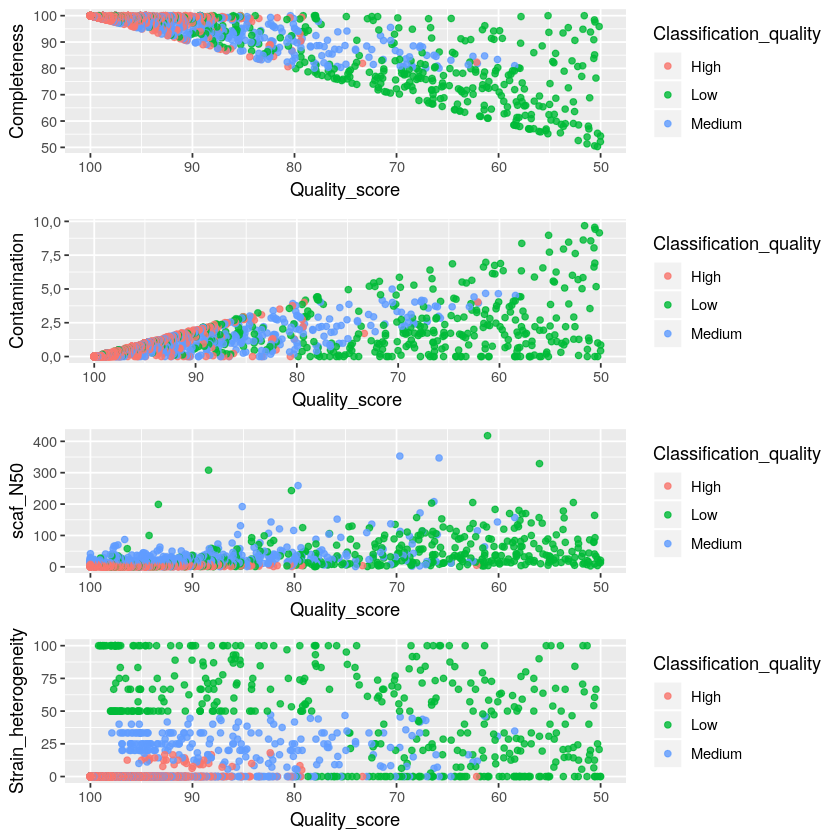

In [17]:
a <- ggplot(data, aes(x=Quality_score, y=Completeness, color=Classification_quality)) +
  scale_x_reverse() +
  geom_point(alpha=0.8) 

b <- ggplot(data, aes(x=Quality_score, y=Contamination, color=Classification_quality)) +
  scale_x_reverse() +
  geom_point(alpha=0.8) 

c <- ggplot(data, aes(x=Quality_score, y=scaf_N50, color=Classification_quality)) +
  scale_x_reverse() +
  geom_point(alpha=0.8) 

d <- ggplot(data, aes(x=Quality_score, y=Strain_heterogeneity, color=Classification_quality)) +
  scale_x_reverse() +
  geom_point(alpha=0.8) 

grid.newpage()
grid.arrange(a, b, c, d, nrow = 4, ncol=1)

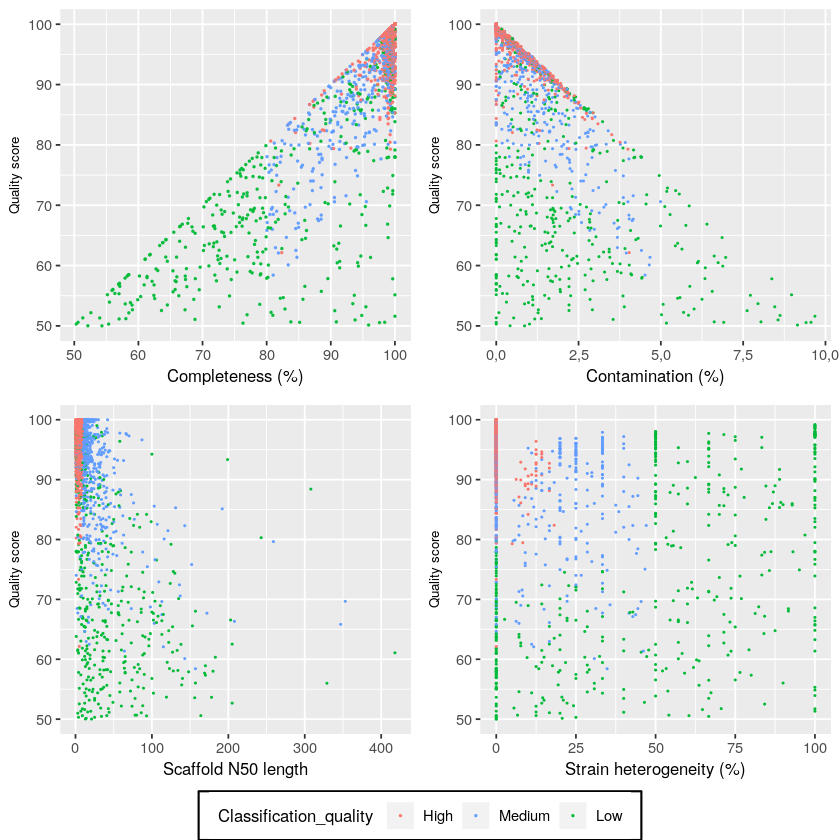

In [18]:
a <- ggplot(data, aes(y=Quality_score, x=Completeness, color=Classification_quality)) +
  geom_point(alpha=0.9, size=0.3 ) +
  labs(y="Quality score", x="Completeness (%)") +
  theme(axis.title.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        legend.box.background = element_rect(colour = "black", size = 0.6),
        legend.box.margin = margin(0.5, 6, 0.5, 6),
        legend.title = element_text(size=10))+
  scale_color_discrete(breaks=c("High","Medium","Low"))

b <- ggplot(data, aes(y=Quality_score, x=Contamination, color=Classification_quality)) +
  geom_point(alpha=1, size=0.2 ) +
  labs(y="Quality score", x="Contamination (%)") +
  theme(axis.title.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        legend.box.background = element_rect(colour = "black", size = 0.6),
        legend.box.margin = margin(0.5, 6, 0.5, 6),
        legend.title = element_text(size=10))+
  scale_color_discrete(breaks=c("High","Medium","Low")) 

c <- ggplot(data, aes(y=Quality_score, x=scaf_N50, color=Classification_quality)) +
  geom_point(alpha=1, size=0.2 ) +
  labs(y="Quality score", x="Scaffold N50 length") +
  theme(axis.title.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        legend.box.background = element_rect(colour = "black", size = 0.6),
        legend.box.margin = margin(0.5, 6, 0.5, 6),
        legend.title = element_text(size=10),
        plot.margin=unit(c(5.5, 5.5, 7, 5.5), "pt"))+
  scale_color_discrete(breaks=c("High","Medium","Low"))

d <- ggplot(data, aes(y=Quality_score, x=Strain_heterogeneity, color=Classification_quality)) +
  geom_point(alpha=1, size=0.2 ) +
  labs(y="Quality score", x="Strain heterogeneity (%)") +
  theme(axis.title.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        legend.box.background = element_rect(colour = "black", size = 0.6),
        legend.box.margin = margin(0.5, 6, 0.5, 6),
        legend.title = element_text(size=10),
        plot.margin=unit(c(5.5, 5.5, 7, 5.5), "pt"))+
  scale_color_discrete(breaks=c("High","Medium","Low"))

ggarrange(a, b, c, d, ncol=2, nrow=2, common.legend = TRUE, legend="bottom")

#ggsave("Comparison2", device="png",scale=1.3)

# DataExplorer

In [ ]:
#For a quick way of visualizing the dataset constructed so far, I recommend the use of the DataExplorer R package, created for Exploratory Data Analysis.
library(DataExplorer)
create_report(data)